In [45]:
import tensorflow
from tensorflow import keras
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Flatten

In [46]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

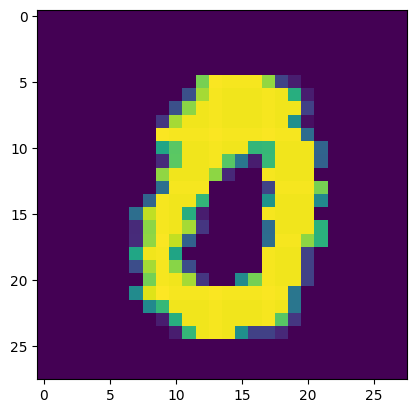

In [60]:
import matplotlib.pyplot as plt
plt.imshow(X_train[69])

In [48]:
X_train = X_train / 255
X_test = X_test / 255

In [49]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [52]:
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2936 - accuracy: 0.9131 - val_loss: 0.1649 - val_accuracy: 0.9528
Epoch 2/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1250 - accuracy: 0.9628 - val_loss: 0.1242 - val_accuracy: 0.9625
Epoch 3/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0862 - accuracy: 0.9740 - val_loss: 0.1118 - val_accuracy: 0.9682
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0641 - accuracy: 0.9803 - val_loss: 0.1112 - val_accuracy: 0.9686
Epoch 5/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9838 - val_loss: 0.1008 - val_accuracy: 0.9696
Epoch 6/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0385 - accuracy: 0.9873 - val_loss: 0.1196 - val_accuracy: 0.9678
Epoch 7/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0331 - accuracy: 0.9893 - val_loss: 0.1074 - val_accuracy:

In [53]:
y_prob = model.predict(X_test)

In [54]:
y_pred = y_prob.argmax(axis=1)

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9758

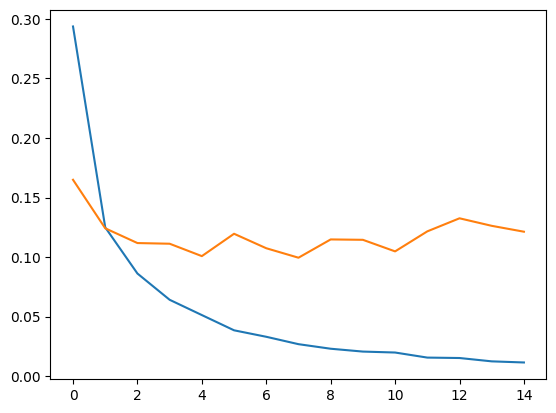

In [56]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

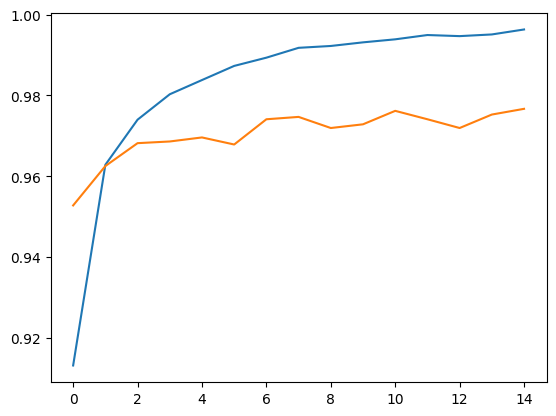

In [57]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])